In [8]:
import pandas as pd

df = pd.read_csv("/cardom file.csv")
df.head()

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,28-11-2025,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,290,102630.4,99035.2,2742,2375.79
1,27-11-2025,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,381,119433.6,109586,3176,2394.35
2,27-11-2025,SOUTH INDIAN CARDAMOM ONLINE AUCTION PRIVATE L...,284,90869.8,89905.1,2780,2370.98
3,26-11-2025,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,156,25476.7,24505.5,2694,2365.77
4,26-11-2025,SPECIALITY INDIAN FOOD PARKS EXPORTS PRIVATE L...,378,119449.7,113730.3,3156,2394.74


 Data Cleaning and Feature Creation


In [9]:
print("Basic Info:")
print(df.info())
print("\nMissing values:")
print(df.isna().sum())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date of Auction          5328 non-null   object
 1   Auctioneer               5328 non-null   object
 2   No.of Lots               5328 non-null   int64 
 3   Total Qty Arrived (Kgs)  5328 non-null   object
 4   Qty Sold (Kgs)           5328 non-null   object
 5   MaxPrice (Rs./Kg)        5328 non-null   object
 6   Avg.Price (Rs./Kg)       5328 non-null   object
dtypes: int64(1), object(6)
memory usage: 291.5+ KB
None

Missing values:
Date of Auction            0
Auctioneer                 0
No.of Lots                 0
Total Qty Arrived (Kgs)    0
Qty Sold (Kgs)             0
MaxPrice (Rs./Kg)          0
Avg.Price (Rs./Kg)         0
dtype: int64


In [15]:
# Convert numeric columns from string to numbers
num_cols = ['Total Qty Arrived (Kgs)', 'Qty Sold (Kgs)',
            'MaxPrice (Rs./Kg)', 'Avg.Price (Rs./Kg)']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date of Auction          5328 non-null   object 
 1   Auctioneer               5328 non-null   object 
 2   No.of Lots               5328 non-null   int64  
 3   Total Qty Arrived (Kgs)  4063 non-null   float64
 4   Qty Sold (Kgs)           4087 non-null   float64
 5   MaxPrice (Rs./Kg)        4748 non-null   float64
 6   Avg.Price (Rs./Kg)       4850 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 291.5+ KB


In [19]:
# Create new columns
df['Unsold_Qty'] = df['Total Qty Arrived (Kgs)'] - df['Qty Sold (Kgs)']
df['Sale_Ratio'] = df['Qty Sold (Kgs)'] / df['Total Qty Arrived (Kgs)']
df.head()

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg),Unsold_Qty,Sale_Ratio
0,28-11-2025,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,290,102630.4,99035.2,2742.0,2375.79,3595.2,0.964969
1,27-11-2025,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,381,119433.6,109586.0,3176.0,2394.35,9847.6,0.917547
2,27-11-2025,SOUTH INDIAN CARDAMOM ONLINE AUCTION PRIVATE L...,284,90869.8,89905.1,2780.0,2370.98,964.7,0.989384
3,26-11-2025,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,156,25476.7,24505.5,2694.0,2365.77,971.2,0.961879
4,26-11-2025,SPECIALITY INDIAN FOOD PARKS EXPORTS PRIVATE L...,378,119449.7,113730.3,3156.0,2394.74,5719.4,0.952119


Average Price Trend Over Time

In [21]:
import matplotlib.pyplot as plt

# conveting Date of Auction is datetime
df['Date of Auction'] = pd.to_datetime(df['Date of Auction'])

In [22]:
# Sort by date
df = df.sort_values('Date of Auction')


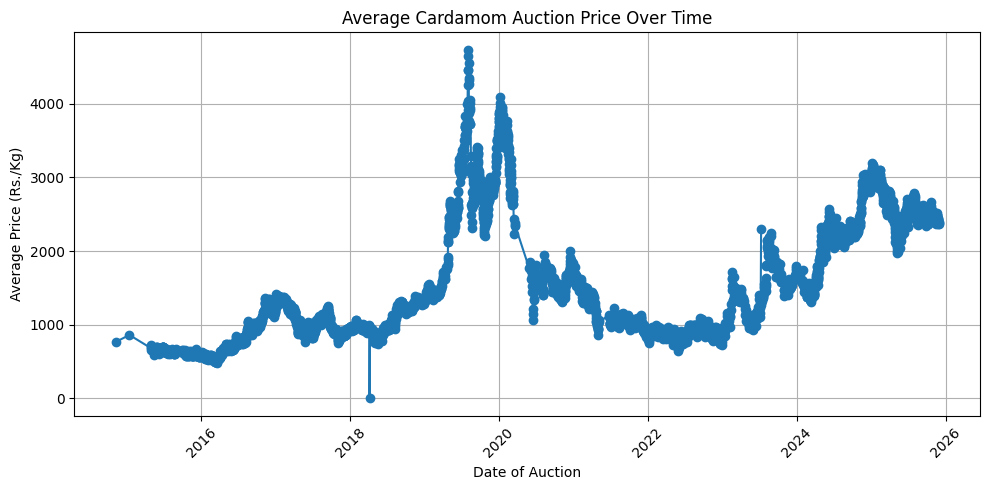

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df['Date of Auction'], df['Avg.Price (Rs./Kg)'], marker='o')
plt.title("Average Cardamom Auction Price Over Time")
plt.xlabel("Date of Auction")
plt.ylabel("Average Price (Rs./Kg)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation – Auction-wise Price Trend

- Prices were relatively stable between 2015 and 2018, with moderate fluctuations around ₹600–₹1,200/kg.
- A massive upward surge occurred between 2019 and early 2020, reaching ₹4,500–₹5,000/kg.
  - This spike is likely due to **supply shortage + high export demand** during that time.
- After 2020, prices dropped sharply due to **increased production and market correction**.
- From 2023 onwards, prices show recovery with moderate volatility around ₹2,200–₹3,000/kg.

Business Insight:
The cardamom market is **highly volatile** and sensitive to supply disruptions — requiring dynamic pricing and inventory control strategies.

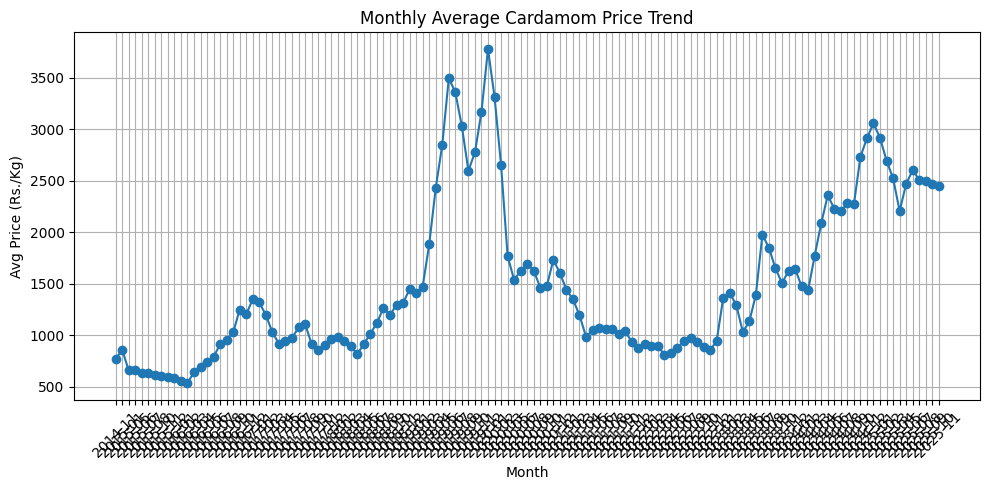

In [24]:
# Monthly average price trend
df['Month'] = df['Date of Auction'].dt.to_period('M')

monthly_df = df.groupby('Month')['Avg.Price (Rs./Kg)'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_df['Month'].astype(str), monthly_df['Avg.Price (Rs./Kg)'], marker='o')
plt.title("Monthly Average Cardamom Price Trend")
plt.xlabel("Month")
plt.ylabel("Avg Price (Rs./Kg)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
# Filter last 2 years data
df['Date of Auction'] = pd.to_datetime(df['Date of Auction'])
last_2_years = df['Date of Auction'].max() - pd.DateOffset(years=2)
df_2yr = df[df['Date of Auction'] >= last_2_years].copy()

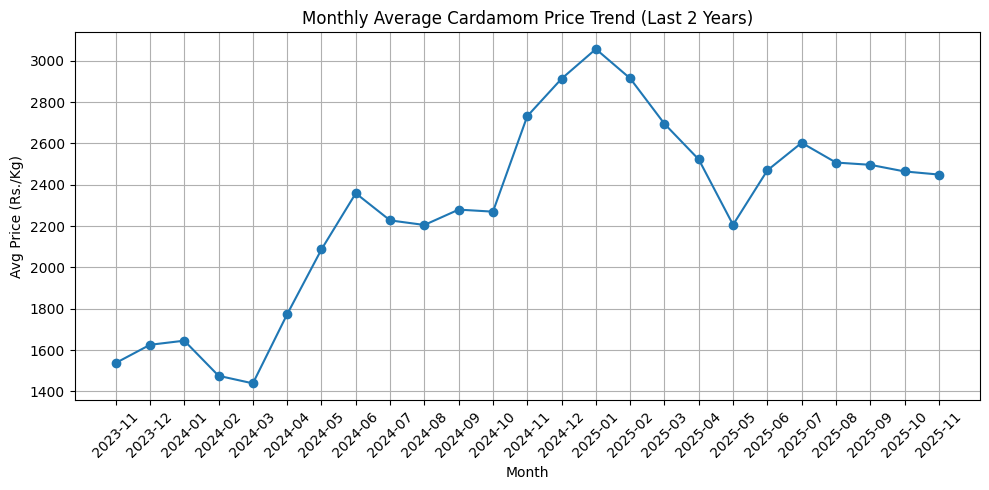

In [26]:
# Monthly average for last 2 years
df_2yr['Month'] = df_2yr['Date of Auction'].dt.to_period('M')
monthly_df_2yr = df_2yr.groupby('Month')['Avg.Price (Rs./Kg)'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_df_2yr['Month'].astype(str), monthly_df_2yr['Avg.Price (Rs./Kg)'], marker='o')
plt.title("Monthly Average Cardamom Price Trend (Last 2 Years)")
plt.xlabel("Month")
plt.ylabel("Avg Price (Rs./Kg)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation – Monthly Trend (Last 2 Years)

- Price increased from ~₹1,500/kg in late 2023 to a peak above ₹3,000/kg in early 2025.
- Clear **seasonal peaks** are visible around:
  - Nov–Jan (festival & export demand)
- After the peak in Jan 2025, prices show a gradual correction but remain significantly higher than previous year levels.

Business Insight:
Seasonality plays a major role. Traders can **buy during mid-year dips** and **sell during peak season** to improve margins.

In [28]:
# Filter last 6 months data
df['Date of Auction'] = pd.to_datetime(df['Date of Auction'])
last_6_months = df['Date of Auction'].max() - pd.DateOffset(months=6)
df_6m = df[df['Date of Auction'] >= last_6_months].copy()


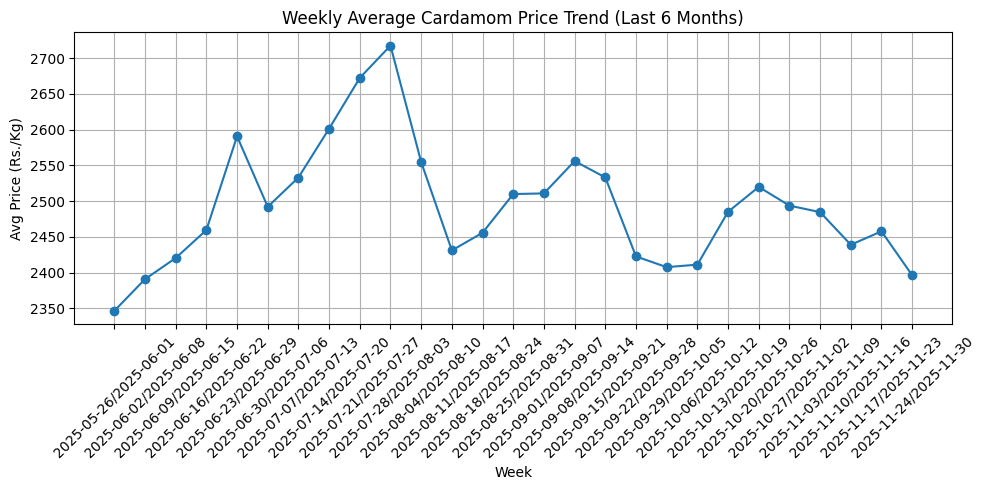

In [29]:
# Weekly average for last 6 months
df_6m['Week'] = df_6m['Date of Auction'].dt.to_period('W')
weekly_df_6m = df_6m.groupby('Week')['Avg.Price (Rs./Kg)'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(weekly_df_6m['Week'].astype(str), weekly_df_6m['Avg.Price (Rs./Kg)'], marker='o')
plt.title("Weekly Average Cardamom Price Trend (Last 6 Months)")
plt.xlabel("Week")
plt.ylabel("Avg Price (Rs./Kg)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation – Weekly Trend (Last 6 Months)

- Short-term price swings are visible week-to-week within the ₹2,350–₹2,700/kg range.
- Peak pricing in July 2025 suggests short supply or stronger export buying.
- Sudden dips in Aug–Sept indicate possible stock release or weak buying interest.

Business Insight:
Weekly monitoring is crucial for auction participants to **choose the right week to bid** and avoid unfavorable pricing.


Price Volatility (Rolling Std Dev)

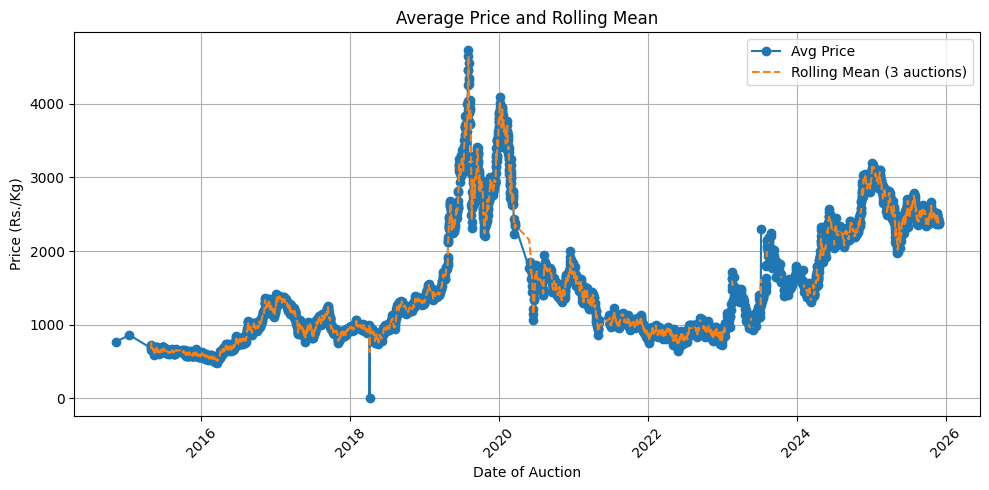

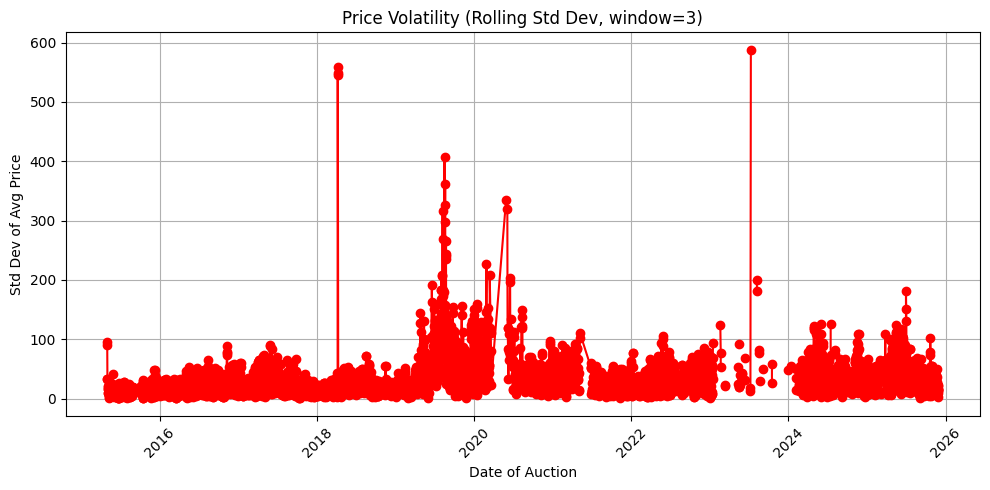

In [31]:
# Set date as index for time-series style analysis
df_ts = df.set_index('Date of Auction').copy()

# Rolling window size (3 auctions here since dataset is small)
window_size = 3

df_ts['Rolling_AvgPrice'] = df_ts['Avg.Price (Rs./Kg)'].rolling(window=window_size).mean()
df_ts['Rolling_Volatility'] = df_ts['Avg.Price (Rs./Kg)'].rolling(window=window_size).std()

plt.figure(figsize=(10,5))
plt.plot(df_ts.index, df_ts['Avg.Price (Rs./Kg)'], label='Avg Price', marker='o')
plt.plot(df_ts.index, df_ts['Rolling_AvgPrice'], label=f'Rolling Mean ({window_size} auctions)', linestyle='--')
plt.title("Average Price and Rolling Mean")
plt.xlabel("Date of Auction")
plt.ylabel("Price (Rs./Kg)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df_ts.index, df_ts['Rolling_Volatility'], marker='o', color='red')
plt.title(f"Price Volatility (Rolling Std Dev, window={window_size})")
plt.xlabel("Date of Auction")
plt.ylabel("Std Dev of Avg Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation – Average Price + Rolling Mean (3 Auctions)

- The rolling mean line closely follows the actual price, but smooths out extreme spikes.
- The **2019–2020 period** shows a significant upward surge in price, indicating supply shortage and higher demand.
- A sharp market correction occurred in late 2020 and into 2021.
- From 2023 onward, a moderate rising pattern is visible, reflecting recovering market conditions.
- Rolling average proves helpful for identifying **medium-term market direction** rather than reacting to each volatile point.

 Business Impact:
Traders should monitor rolling mean trends to **plan stock and bidding strategy** instead of reacting to price noise.


### Interpretation – Price Volatility (Rolling Standard Deviation)

- Volatility remains **low and stable** from 2015 to mid-2018, indicating a predictable market.
- **Late 2018–2020** shows extreme volatility spikes (Std Dev > 300), aligned with the major price boom.
  - This reflects **high uncertainty**, potentially caused by production shortages or export disruptions.
- After 2021, volatility decreases but **not fully stable**, showing continuous short-term fluctuations.
- Smaller volatility spikes seen in 2024–2025 indicate **uneven supply quality & competitive bidding**.

Business Impact:
High volatility exposes traders to **price risk** — requiring:
- Forward contracts
- Hedging strategies
- Inventory planning aligned with risk periods


What Affects Price?
Regression: Impact of Quantity and Sale Ratio on Price




In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare data for regression
features = ['Total Qty Arrived (Kgs)', 'Qty Sold (Kgs)', 'Sale_Ratio']
target = 'Avg.Price (Rs./Kg)'

df_reg = df.dropna(subset=features + [target]).copy()

X = df_reg[features]
y = df_reg[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Performance
print("R² Score:", round(r2_score(y_test, y_pred), 3))
print("\nCoefficients:")
for col, coef in zip(features, model.coef_):
    print(f"{col}: {round(coef, 3)}")

print("\nIntercept:", round(model.intercept_, 3))

R² Score: 0.04

Coefficients:
Total Qty Arrived (Kgs): 0.005
Qty Sold (Kgs): -0.011
Sale_Ratio: 665.716

Intercept: 1205.973


### Regression Model – Interpretation

The linear regression model using Total Qty Arrived, Qty Sold and Sale_Ratio gives an R² of only 0.04. This means that only about 4% of the variation in average auction price is explained by these supply–demand variables.

The coefficient of Sale_Ratio is positive and relatively large, indicating that auctions where a higher proportion of the arrived quantity is sold tend to have higher prices. This is consistent with the idea that stronger demand supports higher price levels.

However, the overall explanatory power of the model is weak. This suggests that cardamom prices are driven mainly by other factors not included in the model, such as quality of lots, weather and crop conditions, export demand, and trader expectations. Therefore, while volume-related indicators give some direction, they are not sufficient to accurately predict auction prices.


The regression model shows that auction volume indicators alone do not strongly explain cardamom price changes. Even though prices tend to rise when demand is high (reflected in Sale Ratio), overall pricing is heavily driven by:

- Quality grades of cardamom lots
- Seasonality and weather conditions
- Export demand and currency fluctuations
- Stock availability with traders

Therefore, stakeholders should rely on broader market indicators (quality ratings, production forecasts, etc.) instead of only supply and sale volumes when predicting price movements.
